**Лекция 7**

# Гауссовские процессы

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Случайные-процессы" data-toc-modified-id="Случайные-процессы-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Случайные процессы</a></span><ul class="toc-item"><li><span><a href="#Базовые-понятия-и-определения" data-toc-modified-id="Базовые-понятия-и-определения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Базовые понятия и определения</a></span></li><li><span><a href="#Моментные-характеристики-процессов" data-toc-modified-id="Моментные-характеристики-процессов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Моментные характеристики процессов</a></span></li></ul></li><li><span><a href="#Гауссовские-процессы" data-toc-modified-id="Гауссовские-процессы-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Гауссовские процессы</a></span><ul class="toc-item"><li><span><a href="#Базовые-понятия-и-определения" data-toc-modified-id="Базовые-понятия-и-определения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Базовые понятия и определения</a></span></li><li><span><a href="#Ковариационная-функция" data-toc-modified-id="Ковариационная-функция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ковариационная функция</a></span></li></ul></li><li><span><a href="#Генерация-реализаций-гауссовского-процесса" data-toc-modified-id="Генерация-реализаций-гауссовского-процесса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Генерация реализаций гауссовского процесса</a></span><ul class="toc-item"><li><span><a href="#Генерация-многомерных-сечений-процесса" data-toc-modified-id="Генерация-многомерных-сечений-процесса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Генерация многомерных сечений процесса</a></span></li><li><span><a href="#Примеры-траекторий" data-toc-modified-id="Примеры-траекторий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Примеры траекторий</a></span></li></ul></li><li><span><a href="#Броуновское-движение-как-гауссовский-процесс" data-toc-modified-id="Броуновское-движение-как-гауссовский-процесс-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Броуновское движение как гауссовский процесс</a></span></li><li><span><a href="#Источники" data-toc-modified-id="Источники-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Источники</a></span></li></ul></div>

In [1]:
# Imports
import numpy as np
np.random.seed(42)
from scipy import stats

import sys
sys.path.append('./scripts')
from GP_utils import generate_gauss_surface

In [2]:
# Styles, fonts
import matplotlib
matplotlib.rcParams['font.size'] = 12
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps

import seaborn
seaborn.set_style('whitegrid')

In [3]:
# %config InlineBackend.figure_formats = ['pdf']
# %config Completer.use_jedi = False

---

## Случайные процессы

Что такое гауссовский процесс?
Как можно догадаться из названия, это процесс, состоящий из случайных величин, распределённых по Гауссу.
Точное определение гласит, что гауссовский процесс &mdash; это случайный процесс, все конечномерные распределения которого гауссовские.
Данное определение (хотя оно и абсолютно верное) всё же не до конца проясняет суть, поэтому давайте разбираться по порядку.

### Базовые понятия и определения

Вначале теория вероятностей имела дело со *случайными экспериментами* (подбрасывание монеты, игральной кости и т.п.), для которых подсчитывались вероятности, в которыми может произойти то или иное событие.
Затем возникло понятие *случайной величины*, позволившее количественно описывать результаты проводимых экспериментов, например, размер выигрыша в лотерее.
Наконец, в случайные эксперименты был явно введён *фактор времени*, что дало возможность строить стохастические модели, в основу которых легло понятие *случайного процесса*, описывающего динамику развития изучаемого случайного явления.

Случайные (или стохастические) процессы обычно описывают системы, случайно меняющиеся с течением времени. Процессы являются стохастическими из-за наличия в системе неопределённости. Даже если исходная точка известна, существует несколько направлений, в которых такие процессы могут развиваться.

**Определение.** *Случайным процессом* называется семейство случайных величин $X(\omega, t)$, $\omega \in \Omega$, заданных на одном вероятностном пространстве $(\Omega, \mathcal{F}, \mathrm{P})$ и зависящих от параметра $t$, принимающего значения из некоторого множества $T \in \mathbb{R}$. Параметр $t$ обычно называют *временем*.

К случайному процессу всегда следует относиться как к функции двух переменных: исхода $\omega$ и времени $t$. Это независимые переменные.

**Определение.** При фиксированном времени $t = t_0$ случайная величина $X(\omega, t_0)$ называется *сечением процесса* в точке $t_0$. При фиксированном исходе $\omega = \omega_0$ функция времени $X(\omega_0, t)$ называется *траекторией* (*реализацией*, *выборочной функцией*) процесса.

**Пример**

Известным примером стохастического процесса является броуновское движение (известное также как винеровский процесс).
Броуновское движение &mdash; это случайное движение частиц, взвешенных в жидкости.
Такое движение может рассматриваться как непрерывное случайное движение, при котором частица перемещается в жидкости из-за случайного столкновения с ней других частиц.

Мы можем смоделировать этот процесс во времени $t$ в одном измерении $d$, начиная с точки $t_0 = 0$ и перемещая частицу за определенное количество времени $\Delta t$ на случайное расстояние $\Delta d$ от предыдущего положения.
Случайное расстояние выбирается из нормального распределения со средним $\mu = 0$ и дисперсией $\sigma^2 = \Delta t$:  $\Delta d \sim \mathcal{N}(0, \Delta t)$.
Позиция $d(t)$ изменяется со временем по следующему закону $d(t + \Delta t) = d(t) + \Delta d$.

In [4]:
# 1D simulation of the Brownian motion process
t_max, n_steps = 1., 500
delta_t = t_max / n_steps
n_processes = int(1e5)  # Simulate n_processes different motions
mean = 0.     # Mean of each movement
sigma_k = 1.  # Scale parameter of each movement
std = sigma_k*np.sqrt(delta_t)  # Standard deviation of each movement

# Simulate the brownian motions in a 1D space by cumulatively making a new movement delta_d
# Move randomly from current location to N(0, delta_t)
t = np.linspace(0, t_max, n_steps+1)
delta_d = np.random.normal(mean, std, (n_steps, n_processes))
distances = np.zeros(((n_steps+1, n_processes)))
distances[1:] = np.cumsum(delta_d, axis=0)

На следующем рисунке приводится несколько различных траекторий броуновского движения, проиллюстрированных разным цветом.
Чёрной линией нарисована зависимость дисперсии процесса от времени: $D(t) = \sqrt{t}.$

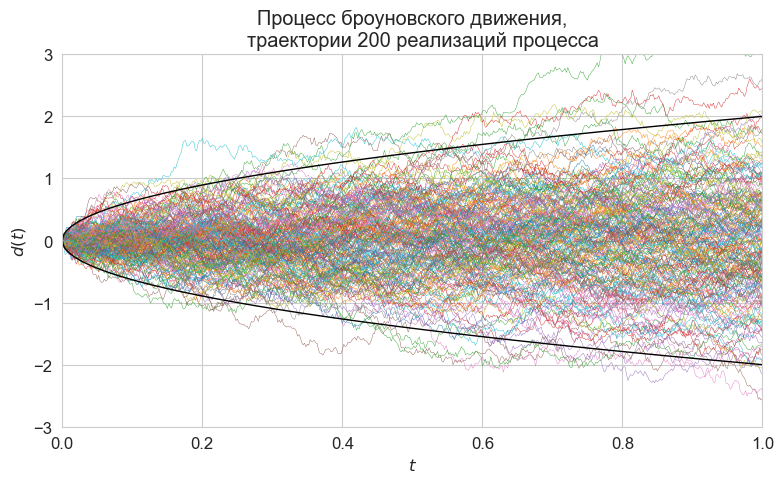

In [5]:
# Make the plots
n_draw = 200
std_t = sigma_k*t**0.5
plt.figure(figsize=(8, 5))
plt.title(f'Процесс броуновского движения,\n\
    траектории {n_draw} реализаций процесса')

for i in range(n_draw):
    plt.plot(t, distances[:,i], lw=.3)
plt.plot(t, -2*std_t, 'k-', lw=1.)
plt.plot(t,  2*std_t, 'k-', lw=1.)

plt.xlabel('$t$')
plt.ylabel('$d(t)$')
plt.xlim([0, t_max])
plt.ylim([-3*sigma_k*t_max**0.5, 3*sigma_k*t_max**0.5])
plt.tight_layout()
plt.show()

Нарисуем гистограмму значений $d(t^\ast)$ в каком-либо сечении $t^\ast = \mathrm{const}$.
На рисунке видно, что распределение $d(t^\ast)$ является гауссовым.

In [6]:
# Make section
t_star = 0.49
i_sec = np.flatnonzero(t == t_star)[0]
d_star = distances[i_sec]
sigma = sigma_k*t_star**0.5

xlim = [-3.5*sigma, 3.5*sigma]
x = np.linspace(*xlim,101)
y = stats.norm.pdf(x, loc=mean, scale=sigma)

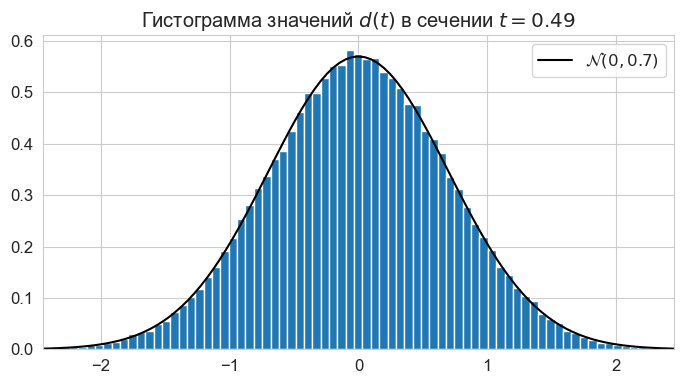

In [7]:
# Draw section histogram
plt.figure(figsize=(7, 4))
plt.title(f'Гистограмма значений $d(t)$ в сечении $t={t_star}$')
plt.hist(d_star, bins=100, density=True)
plt.plot(x, y, 'k-', label=f'$\mathcal{{N}}({mean:.1g}, {sigma:.3g})$')
plt.xlim(xlim)
plt.legend()
plt.tight_layout()
plt.show()

### Моментные характеристики процессов

На рисунке выше можно видеть несколько траекторий стохастического процесса.
Каждая реализация определяет позицию $d$ для каждого возможного временного шага $t$.
Таким образом, каждая реализация соответствует функции $f(t) = d$.

Это означает, что случайный процесс можно интерпретировать как случайное распределение функции.
Мы можем получить реализацию функции с помощью стохастического процесса и каждая реализация будет различной из-за случайности этого процесса.

**Определение.** *Математическим ожиданием* случайного процесса $X(t)$ называется функция $m_x : T \rightarrow \mathbb{R}$, значение который в каждый момент времени $t \in T$ равно математическому ожиданию соответствующего сечения: $m_x(t) = \mathrm{E}[X(t)]$.

**Определение.** *Ковариационной функцией* случайного процесса $X(t)$ называется функция двух переменных $k : T \times T \rightarrow \mathbb{R}$, которая каждой паре моментов времени сопоставляет корреляционный момент соответствующих сечений процесса:
$$
  k(t_1, t_2) = \mathrm{E} \left[ \left(X(t_1) - \mathrm{E}X(t_1)\right) \cdot \left(X(t_2) - \mathrm{E}X(t_2)\right) \right].
$$

---

## Гауссовские процессы

### Базовые понятия и определения

**Определение.** Случайный процесс $Y(x)$ называется *гауссовским*, если для любого $n \ge 1$ и точек $x_1 < \ldots < x_n$ вектор $(Y(x_1), \, \ldots \, , Y(x_n))$ является нормальным случайным вектором.

Другими словами, гауссовский процесс &mdash; это процесс, все конечномерные распределения которого нормальные.

Гауссовский процесс &mdash; это распределение функций $f(x)$, которое определяется средней функцией $m(x)$ и положительной ковариационной функцией $k(x,x')$, где $x$ &mdash; параметр функции, а $(x,x')$ &mdash; все возможные пары из области определения.
Обозначаются гауссовский процесс так:
$$
  f(x) \sim \mathcal{GP}(m(x), k(x,x')).
$$

Для любого конечного подмножества $X=\{x_1 \ldots x_n \}$ области определения $x$ распределение $f(X)$ представляет собой многомерное гауссовское распределение
$$
  f(X) \sim \mathcal{N}(m(X), k(X, X))
$$
со средним вектором $\mathbf{\mu} = m(X)$ и ковариационной матрицей $\Sigma = k(X, X)$.

В то время как многомерное гауссовское  распределение задаёт конечное количество совместно распределённых по Гауссу величин, гауссовский процесс не имеет этого ограничения.
Его среднее и ковариация определяются функциями.
Каждый вход в эту функцию является переменной, коррелирующей с другими переменными входного домена в соответствии с ковариационной функцией.
Поскольку функции могут иметь бесконечный входной домен, гауссовский процесс можно интерпретировать как бесконечную размерную гауссовскую случайную величину.

### Ковариационная функция

Гауссовский процесс полностью определяется функцией среднего и ковариационной функцией.
Ковариационная функция $k(x, x')$ моделирует совместную изменчивость случайных переменных гауссовского процесса, она возвращает значение ковариации между каждой парой $(x, x')$.

Спецификация ковариационной функции (также известной как функция ядра) неявно задаёт распределение по функциям $f(x)$.
Выбирая конкретный вид функции ядра $k$, мы задаём априорную информацию о данном распределении.
Функция ядра должна быть симметричной и положительно-определённой.

Рассмотрим квадратичное экспоненциальное (гауссовское) ядро:
$$
  k(x, x') = \sigma_k^2 \exp{ \left( -\frac{\lVert x - x' \rVert^2}{{2\ell^2}} \right) }.
$$

Параметр длины $l$ контролирует гладкость функции, а параметр амплитуды $\sigma_k$ &mdash; вертикальную вариацию.
В многомерном случае обычно используется один и тот же параметр длины $l$ для всех компонент вектора $x$ (изотропное ядро).
Могут быть определены и другие функции ядра, приводящие к различным свойствам гауссовского процесса.

In [8]:
# Isotropic squared exponential kernel
def gauss_kernel(X1, X2, l=1.0, sigma_k=1.0):
    '''
    Isotropic squared exponential kernel.
    Computes a covariance matrix from points in X1 and X2.
    
    Args:
        X1: Array of m points (m x d)
        X2: Array of n points (n x d)
        sigma_k: Kernel vertical variation parameter

    Returns:
        Covariance matrix (m x n)
    '''
    
    sqdist = np.sum(X1**2,1).reshape(-1,1) + np.sum(X2**2,1) - 2*np.dot(X1,X2.T)
    return sigma_k**2 * np.exp(-0.5 / l**2 * sqdist)

Пример ковариационной матрицы с гауссовским ядром приведён на рисунке слева внизу.
Справа показано одномерное сечение ковариационной функции $k(x,0)$.

In [9]:
xlim = (-3, 3)
X = np.reshape(np.linspace(*xlim, 25), (-1, 1))
Sigma = gauss_kernel(X, X, l=1.)

zero = np.reshape([0], (-1, 1))
Sigma_0 = gauss_kernel(X, zero, l=1.)

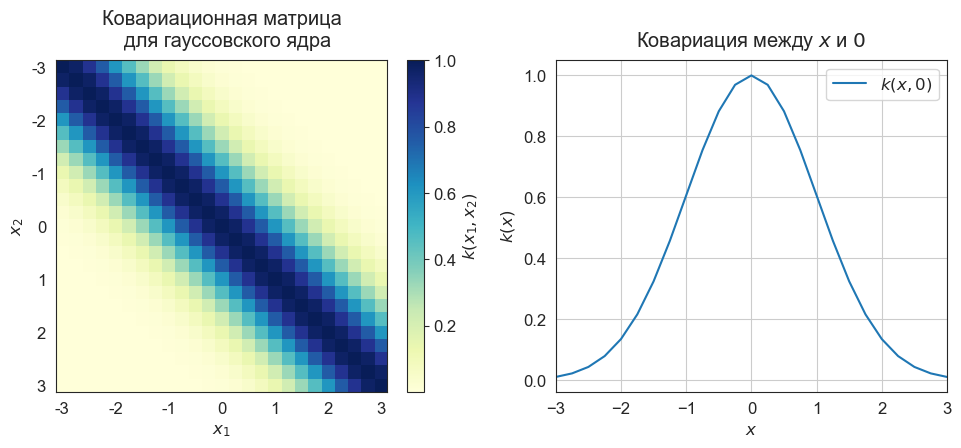

In [10]:
# Show covariance matrix example from exponentiated quadratic
seaborn.set_style('white')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

# Plot covariance matrix
im = ax1.imshow(Sigma, cmap=cm.YlGnBu)
cbar = fig.colorbar(im, ax=ax1, fraction=0.045, pad=0.05)
cbar.ax.set_ylabel('$k(x_1,x_2)$')
ax1.set_title('Ковариационная матрица\n\
  для гауссовского ядра', pad=10)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
labels = list(range(xlim[0], xlim[1]+1))
ticks = np.linspace(0, len(X)-1, len(labels))
ax1.set_xticks(ticks)
ax1.set_yticks(ticks)
ax1.set_xticklabels(labels)
ax1.set_yticklabels(labels)
ax1.grid(False)

# Plot covariance with X=0
ax2.plot(X, Sigma_0, label='$k(x,0)$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$k(x)$')
ax2.set_title('Ковариация между $x$ и $0$',pad=10)
# ax2.set_ylim([0, 1.1])
ax2.set_xlim(*xlim)
ax2.legend(loc=1)
ax2.grid(True)

plt.tight_layout()
plt.show()

---

## Генерация реализаций гауссовского процесса

### Генерация многомерных сечений процесса

На практике мы не можем сгенерировать полную функциональную реализацию $f$ гауссовского процесса, так как для этого потребовалось бы вычислить значения $m(x)$ и $k(x,x')$ в бесконечном количестве точек.
Однако мы можем построить сколь угодно близкую дискретную аппроксимацию $y$ функции $f$. 
Для этого необходимо вычислить значение $f$ на сколь угодно большом, но конечном наборе точек $X$: $y = f(X)$.

Полученное конечномерное сечение гауссовского процесса является гауссовским вектором $y \sim \mathcal{N}(\mu, \Sigma)$ с математическим ожиданием $\mu = m(X)$ и ковариационной матрицей $\Sigma = k(X, X)$.

На рисунке ниже приведена выборка из 5 различных реализаций гауссовского процесса с гауссовским ядром.
Фактически, на рисунке представлены 5 векторов, подчиняющихся 51-мерному гауссовскому распределению $\mathcal{N}(0, k(X, X))$ при $X = [x_1, \ldots, x_{51}]$.

In [11]:
def kernel(X, Y):
    return gauss_kernel(X, Y, l=1., sigma_k=1.)

In [12]:
# Sample from the Gaussian process distribution
n_samples   = 51  # Number of points in each function
n_functions =  5  # Number of functions to sample
# Independent variable samples
X = np.reshape(np.linspace(0, 10, n_samples), (-1, 1))
Sigma = kernel(X, X)  # Kernel of data points

# Draw samples from the prior at our data points.
# Assume a mean of 0 for simplicity
ys = np.random.multivariate_normal(
    mean=np.zeros(n_samples), cov=Sigma, size=n_functions)

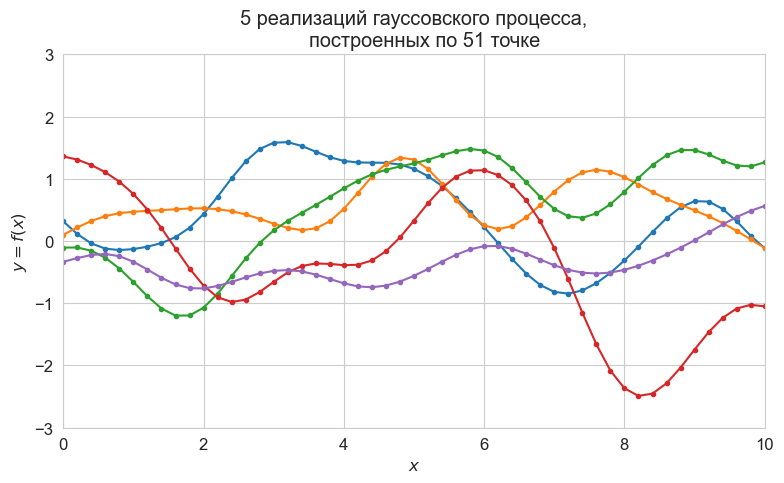

In [13]:
# Plot the sampled functions
seaborn.set_style('whitegrid')
plt.figure(figsize=(8, 5))
for i in range(n_functions):
    plt.plot(X, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$')
plt.ylabel('$y = f(x)$')
plt.title(f'{n_functions} реализаций гауссовского процесса,\n\
    построенных по {n_samples} точке')
plt.xlim([ 0, 10])
plt.ylim([-3,  3])
plt.tight_layout()
plt.show()

Другой способ визуализации &mdash; сделать двумерное сечения процесса в точке $X = (x_1, x_2)$.
Мы получим двумерную нормальную плотность с математическим ожиданием $\mu(X)$ и ковариационной матрицей $k(X,X)$.


Следующий рисунок слева визуализирует два двумерных сечения: $X = [0, 0.2]$ с  ковариацией $k(0, 0.2) = 0.98$ и $X = [0, 2]$ с ковариацией $k(0, 2) = 0.14$.
Частные реализации процесса, приведённые выше, представлены на рисунке цветными точками.

На рисунках видно, что близкорасположенные точки сильно скоррелированны, 
в то время как точки, находящиеся далеко друг от друга, практически независимы.

In [14]:
mu = np.array([0., 0.])

# Strong correlation
x1, x2 = 0., 0.2
X_strong = np.reshape([x1, x2], (-1, 1))
Sigma_strong = kernel(X_strong, X_strong)
# Select samples
X_00_index = np.where(np.isclose(X, x1))
X_02_index = np.where(np.isclose(X, x2))
y_strong = ys[:,[X_00_index[0][0], X_02_index[0][0]]]

# Strong correlation
x1, x2 = 0., 2.
X_weak = np.reshape([x1, x2], (-1, 1))
Sigma_weak = kernel(X_weak, X_weak)
# Select samples
X_0_index = np.where(np.isclose(X, x1))
X_2_index = np.where(np.isclose(X, x2))
y_weak = ys[:,[X_0_index[0][0], X_2_index[0][0]]]

In [15]:
print(Sigma_weak)

[[1.         0.13533528]
 [0.13533528 1.        ]]


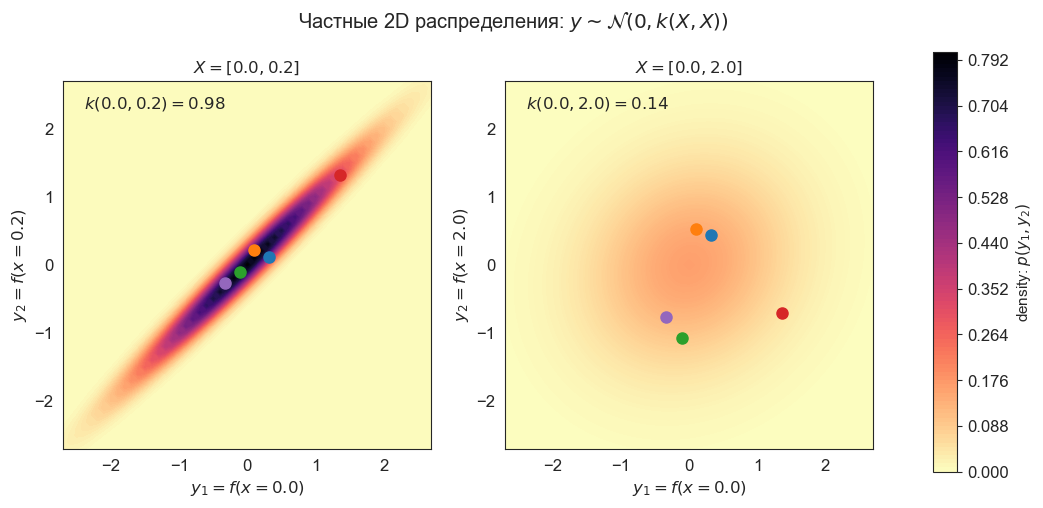

In [16]:
# Show marginal 2D Gaussians
seaborn.set_style('white')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot of strong correlation
y1, y2, p = generate_gauss_surface(mu, Sigma_strong)
# Plot bivariate distribution
con1 = ax1.contourf(y1, y2, p, 100, cmap=cm.magma_r)
ax1.set_xlabel(f'$y_1 = f(x={X_strong[0,0]})$')
ax1.set_ylabel(f'$y_2 = f(x={X_strong[1,0]})$')
ax1.axis([-2.7, 2.7, -2.7, 2.7])
ax1.set_aspect('equal')
ax1.text(-2.4, 2.3,
    (f'$k({X_strong[0,0]}, {X_strong[1,0]}) = {Sigma_strong[0,1]:.2f}$'), 
    fontsize=12)
ax1.set_title(f'$X = [{X_strong[0,0]}, {X_strong[1,0]}]$ ', fontsize=12)
# Show samples on surface
for i in range(y_strong.shape[0]):
    ax1.plot(y_strong[i,0], y_strong[i,1], 'o', ms=8)

# Plot weak correlation
y1, y2, p = generate_gauss_surface(mu, Sigma_weak)
# Plot bivariate distribution
con2 = ax2.contourf(y1, y2, p, 100, cmap=cm.magma_r)
con2.set_cmap(con1.get_cmap())
con2.set_clim(con1.get_clim())
ax2.set_xlabel(f'$y_1 = f(x={X_weak[0,0]})$')
ax2.set_ylabel(f'$y_2 = f(x={X_weak[1,0]})$')
ax2.axis([-2.7, 2.7, -2.7, 2.7])
ax2.set_aspect('equal')
ax2.text(-2.4, 2.3, 
    (f'$k({X_weak[0,0]}, {X_weak[1,0]}) = {Sigma_weak[0,1]:.2f}$'),
    fontsize=12)
ax2.set_title(f'$X = [{X_weak[0,0]}, {X_weak[1,0]}]$', fontsize=12)
# Show samples on surface
for i in range(y_weak.shape[0]):
    ax2.plot(y_weak[i,0], y_weak[i,1], 'o', ms=8)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con1, cax=cbar_ax)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=11)
fig.suptitle('Частные 2D распределения: $y \sim \mathcal{N}(0, k(X, X))$', y=0.92)
plt.show()

### Примеры траекторий

Сгенерируем выборку реализаций гауссовского процесса с нулевой средней функцией $\mu(x) = 0$ и гауссовской функцией ядра.

На рисунке ниже приведены примеры таких реализаций.

In [17]:
def plot_gp(mu, cov, X_test, X_train=[], Y_train=[],
            samples=[], draw_ci=False):
    '''Plot gaussian process'''
    X_test = X_test.ravel()
    mu = mu.ravel()
    std = np.sqrt(np.diag(cov))
    
    if draw_ci:
        for std_i in np.linspace(2*std,0,11):
            plt.fill_between(X_test, mu-std_i, mu+std_i,
                             color='grey', alpha=0.02)
    if len(samples):
        plt.plot(X_test, samples, '-', lw=.5)
    plt.plot(X_test, mu, 'k')
    if len(X_train):
        plt.plot(X_train, Y_train, 'kx', mew=1.0)
    plt.xlim([X_test.min(), X_test.max()])
    plt.ylim([(mu-3*std).min(), (mu+3*std).max()])
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$', rotation=0)

In [18]:
# Test data
x_min, x_max = 0, 10
n_test = 101
X_test = np.linspace(x_min, x_max, n_test).reshape(-1, 1)

# Set mean and covariance
M = np.zeros_like(X_test).reshape(-1, 1)
l = 1e-1*(x_max-x_min)
K = gauss_kernel(X_test, X_test, l=l)

# Generate samples from the prior
n_p = int(1e5)
L = np.linalg.cholesky(K + 1e-6*np.eye(n_test))
gp = M + np.dot(L, np.random.normal(size=(n_test,n_p)))

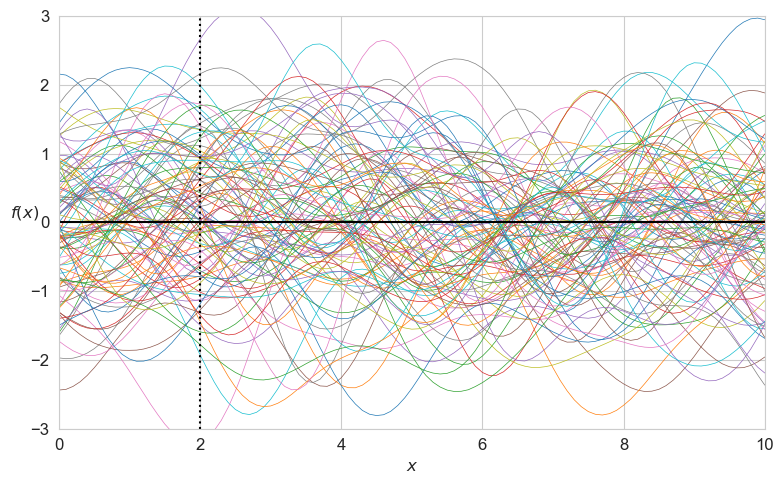

In [19]:
# Draw samples from the prior
x_i, n_draw = 2., 100
seaborn.set_style('whitegrid')

plt.figure(figsize=(8, 5))
plot_gp(M, K, X_test, samples=gp[:,:n_draw])
plt.axvline(x_i, c='k', ls=':')
plt.tight_layout()
plt.show()

Убедимся в правильных статистических характеристиках нашей выборки. Для этого нарисуем гистограмму значений $f(x)$ в каком-либо сечении $x = \mathrm{const}$. Согласно определению гауссовского процесса распределение $f(x)$ должно быть гауссовым.

In [20]:
# Make section
i_sec = np.flatnonzero(X_test.ravel() == x_i)[0]
gp_i = gp[i_sec]
mean  = M.flatten()[i_sec]
sigma = np.sqrt(np.diag(K)[i_sec])

xlim = [-3.5*sigma, 3.5*sigma]
x = np.linspace(*xlim, 101)
y = stats.norm.pdf(x, loc=mean, scale=sigma)

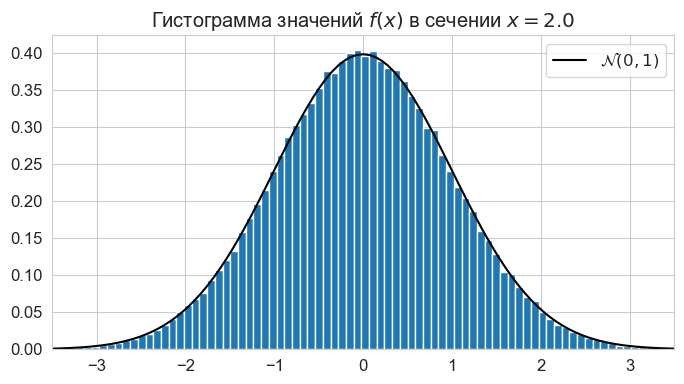

In [21]:
# Draw section histogram
plt.figure(figsize=(7, 4))
plt.title(f'Гистограмма значений $f(x)$ в сечении $x={x_i}$')
plt.hist(gp_i, bins=100, density=True)
plt.plot(x, y, 'k-', label=f'$\mathcal{{N}}({mean:.1g}, {sigma:.3g})$')
plt.xlim(xlim)
plt.legend()
plt.tight_layout()
plt.show()

---

## Броуновское движение как гауссовский процесс

Ранее, построив гистограмму сечения процесса броуновского движения, мы увидели, что это гауссовский процесс.
Тогда процесс броуновского движения можно реализовать, задав подходящую ковариационную функцию.
Несложно убедится, что в качестве такой функции подходит $k(x, x') = \min(x, x')$.

In [22]:
def brownian_kernel(X1, X2, sigma_k=1.):
    '''
    Brownian motion kernel
    
    Args:
        X1: Array of m points (m x d)
        X2: Array of n points (n x d)

    Returns:
        Covariance matrix (m x n)
    '''
    
    cov = np.min(np.dstack(np.meshgrid(X1, X2)), axis=-1)
    return sigma_k**2 * cov.T

In [23]:
# Test data
x_min, x_max = 0, 1
n_test = 500
X_test = np.linspace(x_min, x_max, n_test+1).reshape(-1, 1)

# Set mean and covariance
sigma_k = 1.0
M = np.zeros_like(X_test[1:]).reshape(-1, 1)
K = brownian_kernel(X_test[1:], X_test[1:], sigma_k)

# Generate samples from the prior
n_p = int(1e5)
L = np.linalg.cholesky(K + 1e-6*np.eye(n_test))
bp = np.zeros(((n_test+1, n_p)))
bp[1:] = M + np.dot(L, np.random.normal(size=(n_test,n_p)))

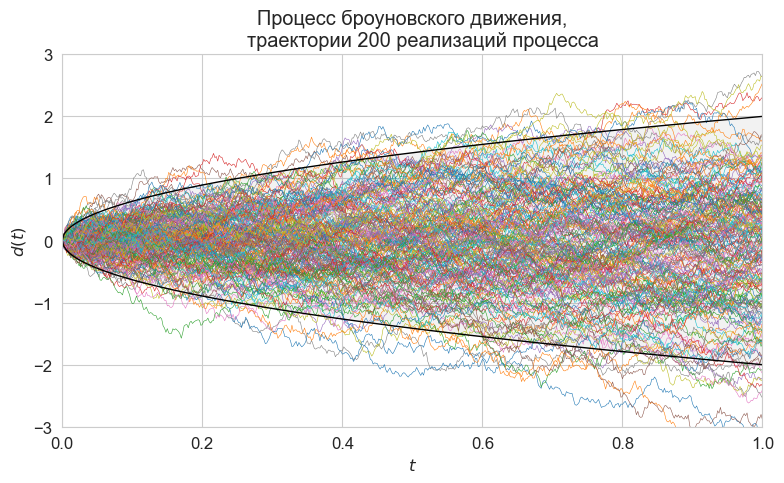

In [24]:
# Make the plots
n_draw = 200
x = X_test.flatten()
std_x = sigma_k*x**0.5
plt.figure(figsize=(8, 5))
plt.title(f'Процесс броуновского движения,\n\
    траектории {n_draw} реализаций процесса')

for i in range(n_draw):
    plt.plot(x, bp[:,i], lw=.4)
plt.fill_between(x, -2*std_x, 2*std_x, fc='grey', alpha=0.1)
plt.plot(x, -2*std_x, 'k-', lw=1.)
plt.plot(x,  2*std_x, 'k-', lw=1.)

plt.xlabel('$t$')
plt.ylabel('$d(t)$')
plt.xlim([0, x_max])
plt.ylim([-3*sigma_k*x_max**0.5, 3*sigma_k*x_max**0.5])
plt.tight_layout()
plt.show()

---

## Источники

1. Лекции по случайным процессам / под ред. А.В. Гасникова. М.: МФТИ, 2019.
1. *Roelants P.* [Understanding Gaussian processes](https://peterroelants.github.io/posts/gaussian-process-tutorial/).
1. *Krasser M.* [Gaussian processes](http://krasserm.github.io/2018/03/19/gaussian-processes/).

In [25]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.7.16
numpy: 1.20.3
matplotlib: 3.5.1
seaborn: 0.12.2
